In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
from HyperParameterTuning import *


# from MakeSTFTs import *
# from Train import *
# from AudioUtils import *

# Load a demo sample, convert to STFT and back and play the sound.
#demo_stft("Samples/Piano C4 Major 13.wav", 2048, 2048*3//4)

Using device=mps
Using sample rate=44100 Hz, FFT=2048 buckets, hop=1536 samples, duration=2.0 sec = 57 time steps


In [3]:
# Read all available samples and convert to STFTs
#make_STFTs()

Loaded 994 STFTs from STFTs.pkl


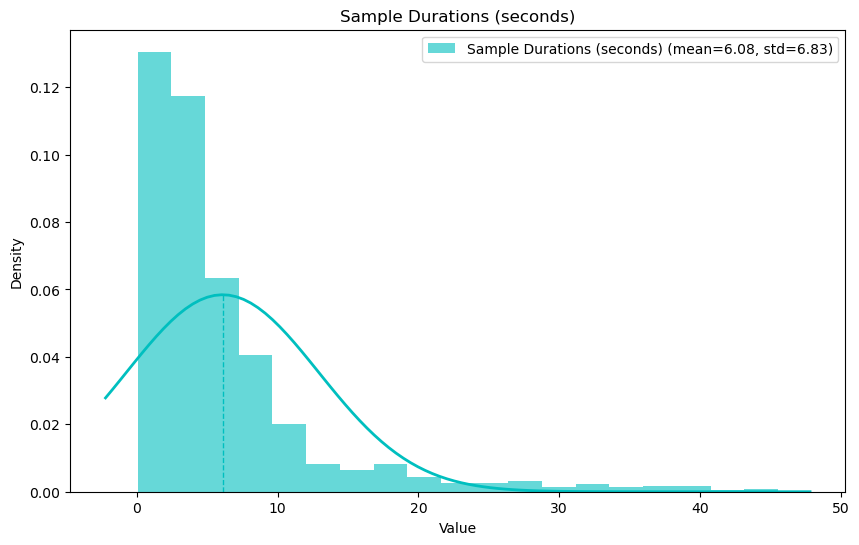

Augmenting training dataset using 190 random mixes
Using train=950 samples, test=190 samples.
950 training samples, 2048 frequencies, 57 time-steps, maximum model size is 11,089,920.0 parameters.
Using model=STFT_VAE
Optimising hyper-parameters:


[Integer(low=16, high=256, prior='log-uniform', transform='identity'),
 Real(low=1e-06, high=0.01, prior='log-uniform', transform='identity'),
 Real(low=1e-08, high=0.01, prior='log-uniform', transform='identity'),
 Integer(low=4, high=10, prior='uniform', transform='identity'),
 Integer(low=1, high=5, prior='uniform', transform='identity'),
 Real(low=0.1, high=4, prior='log-uniform', transform='identity')]

Hyper-Parameter tuning#1: [params]

optimiser: batch=161, learning_rate=6e-06, weight_decay=9e-07
STFT_VAE latent=4, layers=2, ratio=0.11
VariationalAutoEncoder compression: 29184.0 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList()
  (fc_mu): Linear(in_features=116736, out_features=4, bias=True)
  (fc_logvar): Linear(in_features=116736, out_features=4, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=4, out_features=116736, bias=True)
  )
)

model=STFT_VAE, approx size=933,896 parameters, exact=1,517,576, difference=-38.4613%
model: STFT_VAE latent=4, layers=2, ratio=0.11
train=950 samples, batch=161 --> 5.9 batches/epoch
Model stalled.


Finished Training after 20 epochs in 1.5 sec (0.07 sec/epoch), sample duration=2.0 sec, test loss=7311650.71, train loss=7478680.58, overfit=1.0


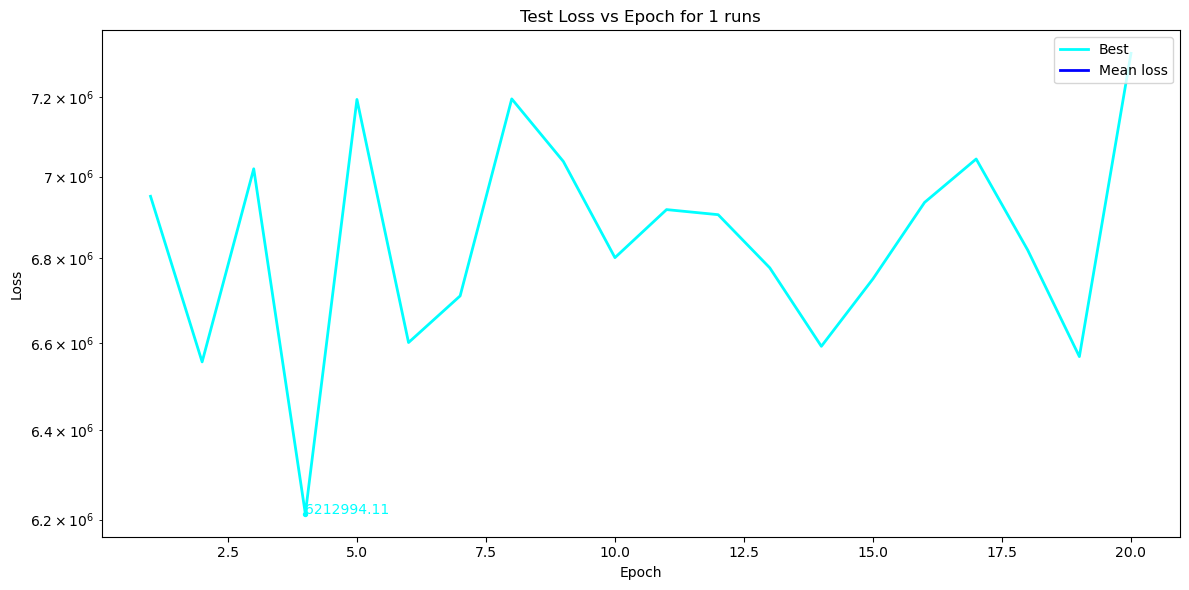

Hyper-Parameter tuning#2: [params]

optimiser: batch=40, learning_rate=0.0006, weight_decay=0.0009
STFT_VAE latent=7, layers=4, ratio=0.69
Model is too large: approx 17,955,319,222 parameters vs max=110,899,200
Hyper-Parameter tuning#3: [params]

optimiser: batch=80, learning_rate=6e-05, weight_decay=3e-08
STFT_VAE latent=6, layers=5, ratio=0.27
Model is too large: approx 10,432,093,018 parameters vs max=110,899,200
Hyper-Parameter tuning#4: [params]

optimiser: batch=20, learning_rate=0.006, weight_decay=3e-05
STFT_VAE latent=9, layers=3, ratio=1.73
Model is too large: approx 19,028,430,558 parameters vs max=110,899,200
Hyper-Parameter tuning#5: [params]

optimiser: batch=28, learning_rate=0.0002, weight_decay=0.005
STFT_VAE latent=5, layers=1, ratio=2.74
VariationalAutoEncoder compression: 23347.2 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList()
  (fc_mu): Linear(in_features=116736, out_features=5, bias=True)
  (fc_logvar): Linear(in_features=116736, out_features=5, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=5, out_features=116736, bias=True)
  )
)

model=STFT_VAE, approx size=1,167,370 parameters, exact=1,867,786, difference=-37.4998%
model: STFT_VAE latent=5, layers=1, ratio=2.74
train=950 samples, batch=28 --> 33.9 batches/epoch
total=2 sec, epoch=9 (0.2 sec/epoch), train=846190.08 (-2.54%), test=880647.35 (-8.20%), overfit=1.04


Finished Training after 20 epochs in 4.6 sec (0.23 sec/epoch), sample duration=2.0 sec, test loss=604246.47, train loss=489988.34, overfit=1.2


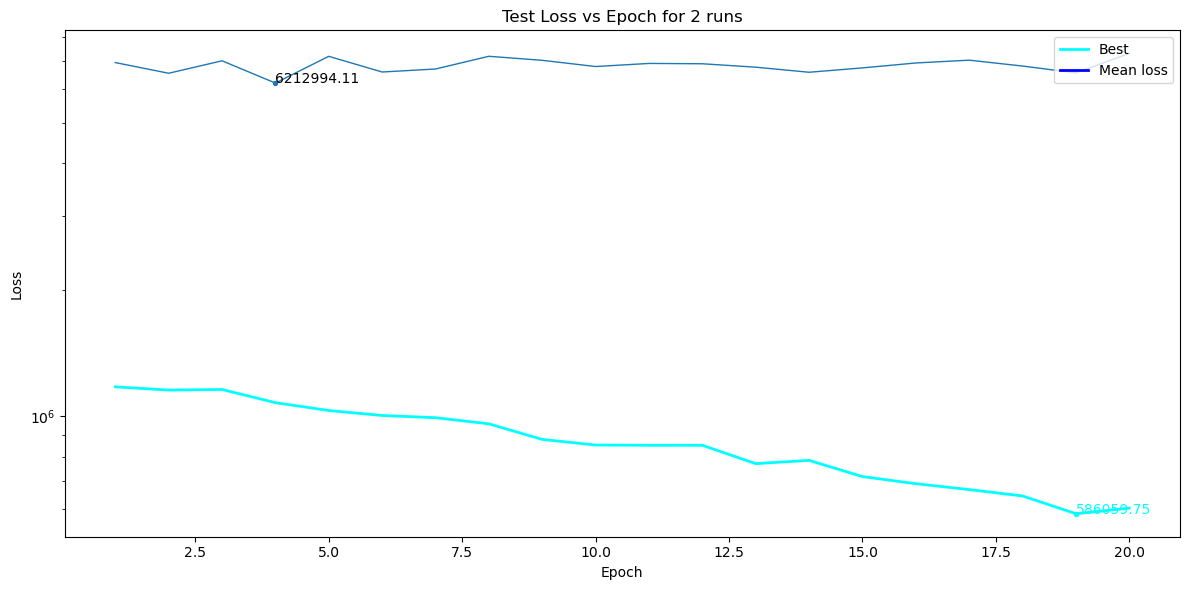

Hyper-Parameter tuning#6: [params]

optimiser: batch=114, learning_rate=2e-06, weight_decay=5e-06
STFT_VAE latent=8, layers=3, ratio=0.43
Model is too large: approx 7,071,711,646 parameters vs max=110,899,200
Hyper-Parameter tuning#7: [params]

optimiser: batch=57, learning_rate=2e-05, weight_decay=0.0002
STFT_VAE latent=7, layers=2, ratio=1.09
VariationalAutoEncoder compression: 16676.6 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList()
  (fc_mu): Linear(in_features=116736, out_features=7, bias=True)
  (fc_logvar): Linear(in_features=116736, out_features=7, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=7, out_features=116736, bias=True)
  )
)

model=STFT_VAE, approx size=1,634,318 parameters, exact=2,568,206, difference=-36.3634%
model: STFT_VAE latent=7, layers=2, ratio=1.09
train=950 samples, batch=57 --> 16.7 batches/epoch
total=3 sec, epoch=20 (0.1 sec/epoch), train=2346621.88 (1.18%), test=2286370.35 (1.35%), overfit=0.97
total=8 sec, epoch=63 (0.1 sec/epoch), train=2039760.67 (2.82%), test=1990284.27 (-0.16%), overfit=0.98


Finished Training after 100 epochs in 12.1 sec (0.12 sec/epoch), sample duration=2.0 sec, test loss=1818678.62, train loss=1759956.34, overfit=1.0


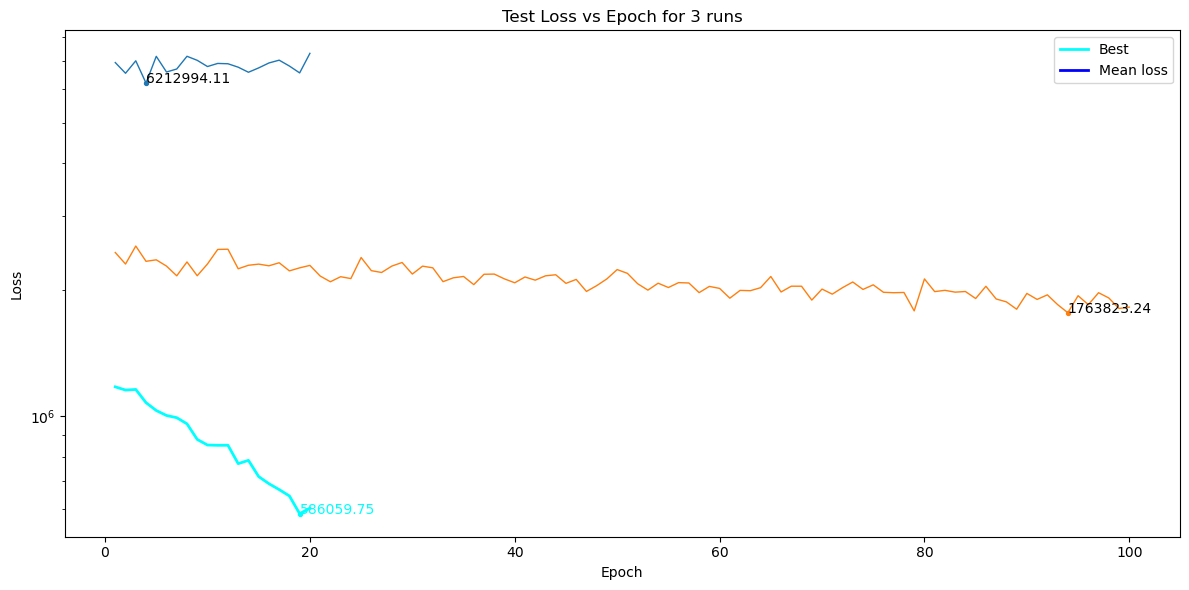

Hyper-Parameter tuning#8: [params]

optimiser: batch=227, learning_rate=0.002, weight_decay=2e-07
STFT_VAE latent=10, layers=4, ratio=0.17
Model is too large: approx 5,018,950,674 parameters vs max=110,899,200
Hyper-Parameter tuning#9: [params]

optimiser: batch=17, learning_rate=0.0001, weight_decay=7e-05
STFT_VAE latent=8, layers=4, ratio=0.22
Model is too large: approx 6,268,325,170 parameters vs max=110,899,200
Hyper-Parameter tuning#10: [params]

optimiser: batch=68, learning_rate=1e-06, weight_decay=7e-08
STFT_VAE latent=5, layers=2, ratio=1.37
VariationalAutoEncoder compression: 23347.2 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList()
  (fc_mu): Linear(in_features=116736, out_features=5, bias=True)
  (fc_logvar): Linear(in_features=116736, out_features=5, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=5, out_features=116736, bias=True)
  )
)

model=STFT_VAE, approx size=1,167,370 parameters, exact=1,867,786, difference=-37.4998%
model: STFT_VAE latent=5, layers=2, ratio=1.37
train=950 samples, batch=68 --> 14.0 batches/epoch
total=1 sec, epoch=4 (0.1 sec/epoch), train=3216475.31 (2.83%), test=3072893.26 (9.23%), overfit=0.96
Model stalled.


Finished Training after 33 epochs in 3.7 sec (0.11 sec/epoch), sample duration=2.0 sec, test loss=3035657.63, train loss=3094618.14, overfit=1.0


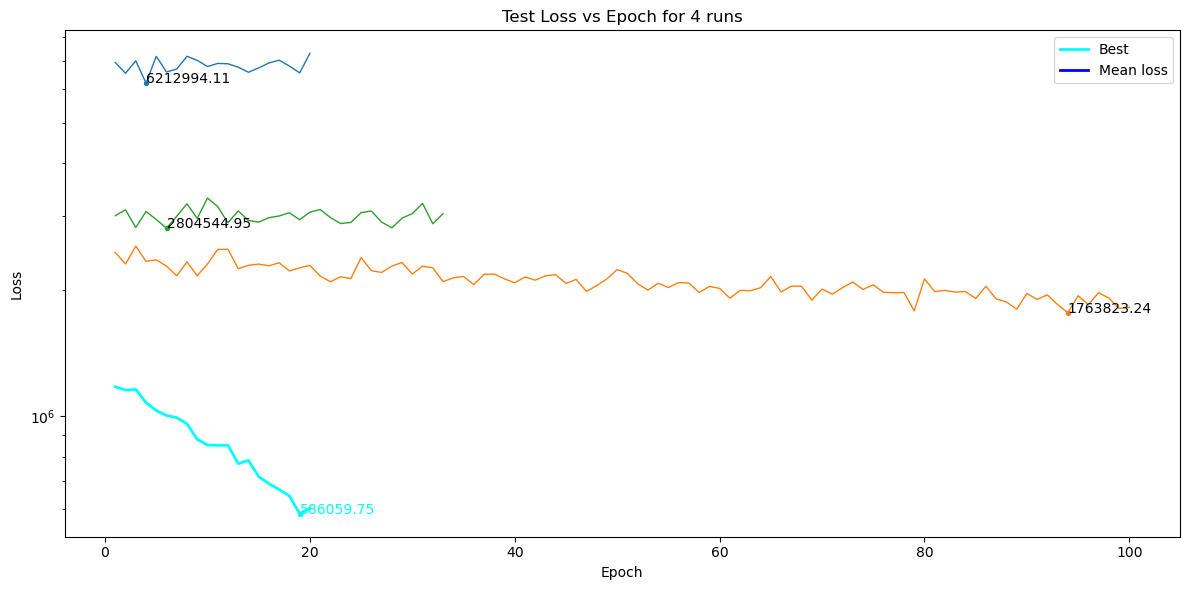

Hyper-Parameter tuning#11: [params]

optimiser: batch=135, learning_rate=1e-05, weight_decay=0.002
STFT_VAE latent=10, layers=3, ratio=0.55
Model is too large: approx 8,584,173,436 parameters vs max=110,899,200
Hyper-Parameter tuning#12: [params]

optimiser: batch=34, learning_rate=0.001, weight_decay=2e-06
STFT_VAE latent=7, layers=1, ratio=3.45
VariationalAutoEncoder compression: 16676.6 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList()
  (fc_mu): Linear(in_features=116736, out_features=7, bias=True)
  (fc_logvar): Linear(in_features=116736, out_features=7, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=7, out_features=116736, bias=True)
  )
)

model=STFT_VAE, approx size=1,634,318 parameters, exact=2,568,206, difference=-36.3634%
model: STFT_VAE latent=7, layers=1, ratio=3.45
train=950 samples, batch=34 --> 27.9 batches/epoch
total=2 sec, epoch=10 (0.2 sec/epoch), train=188173.44 (-16.86%), test=224233.73 (-7.09%), overfit=1.19


Finished Training after 20 epochs in 3.8 sec (0.19 sec/epoch), sample duration=2.0 sec, test loss=37238.56, train loss=28537.28, overfit=1.3


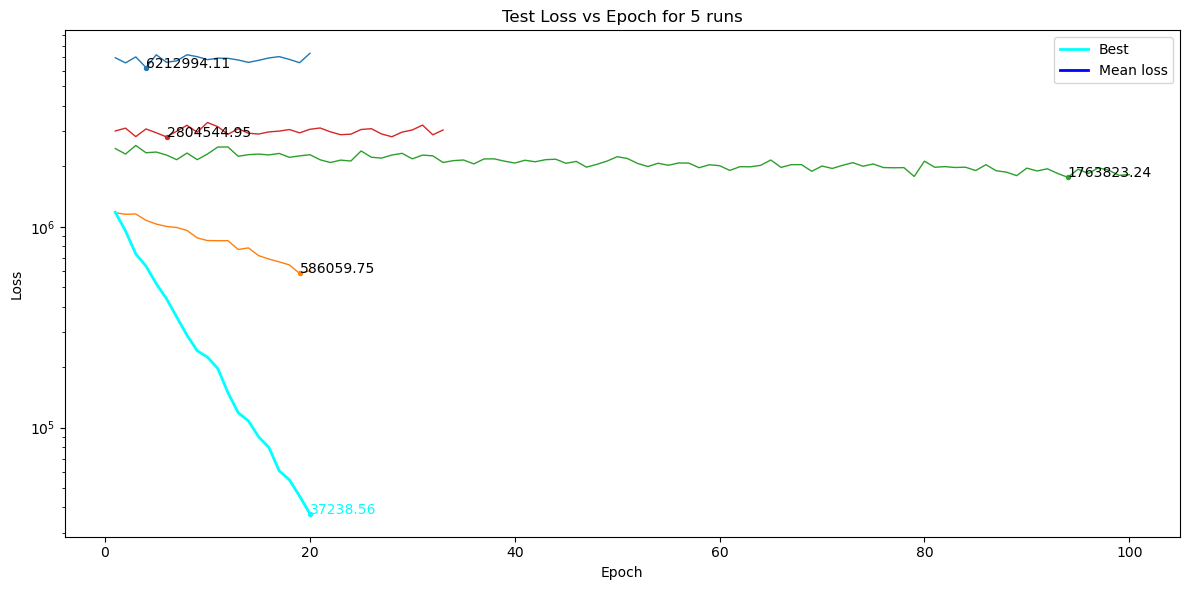

Hyper-Parameter tuning#13: [params]

optimiser: batch=24, learning_rate=3e-05, weight_decay=4e-07
STFT_VAE latent=8, layers=4, ratio=2.18
Model is too large: approx 39,272,294,134 parameters vs max=110,899,200
Hyper-Parameter tuning#14: [params]

optimiser: batch=96, learning_rate=0.003, weight_decay=0.0004
STFT_VAE latent=5, layers=2, ratio=0.34
VariationalAutoEncoder compression: 23347.2 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList()
  (fc_mu): Linear(in_features=116736, out_features=5, bias=True)
  (fc_logvar): Linear(in_features=116736, out_features=5, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=5, out_features=116736, bias=True)
  )
)

model=STFT_VAE, approx size=1,167,370 parameters, exact=1,867,786, difference=-37.4998%
model: STFT_VAE latent=5, layers=2, ratio=0.34
train=950 samples, batch=96 --> 9.9 batches/epoch
*** Aborting: model exploded, loss=272604256.00 vs max=10000000.0
Hyper-Parameter tuning#15: [params]

optimiser: batch=48, learning_rate=0.0003, weight_decay=1e-05
STFT_VAE latent=9, layers=5, ratio=0.87
Model is too large: approx 30,340,456,828 parameters vs max=110,899,200
Hyper-Parameter tuning#16: [params]

optimiser: batch=191, learning_rate=3e-06, weight_decay=1e-08
STFT_VAE latent=6, layers=3, ratio=0.14
Model is too large: approx 2,466,779,602 parameters vs max=110,899,200
Hyper-Parameter tuning#17: [params]

optimiser: batch=16, learning_rate=1e-06, weight_decay=1e-08
STFT_VAE latent=10, layers=2, ratio=4.00
VariationalAutoEncoder compression: 11673.6 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList()
  (fc_mu): Linear(in_features=116736, out_features=10, bias=True)
  (fc_logvar): Linear(in_features=116736, out_features=10, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=10, out_features=116736, bias=True)
  )
)

model=STFT_VAE, approx size=2,334,740 parameters, exact=3,618,836, difference=-35.4837%
model: STFT_VAE latent=10, layers=2, ratio=4.00
train=950 samples, batch=16 --> 59.4 batches/epoch
total=3 sec, epoch=7 (0.4 sec/epoch), train=670169.06 (-0.89%), test=690088.16 (2.42%), overfit=1.03
total=8 sec, epoch=22 (0.4 sec/epoch), train=671036.13 (2.03%), test=688530.06 (3.54%), overfit=1.03
Model stalled.


Finished Training after 24 epochs in 8.8 sec (0.37 sec/epoch), sample duration=2.0 sec, test loss=680655.76, train loss=678588.75, overfit=1.0


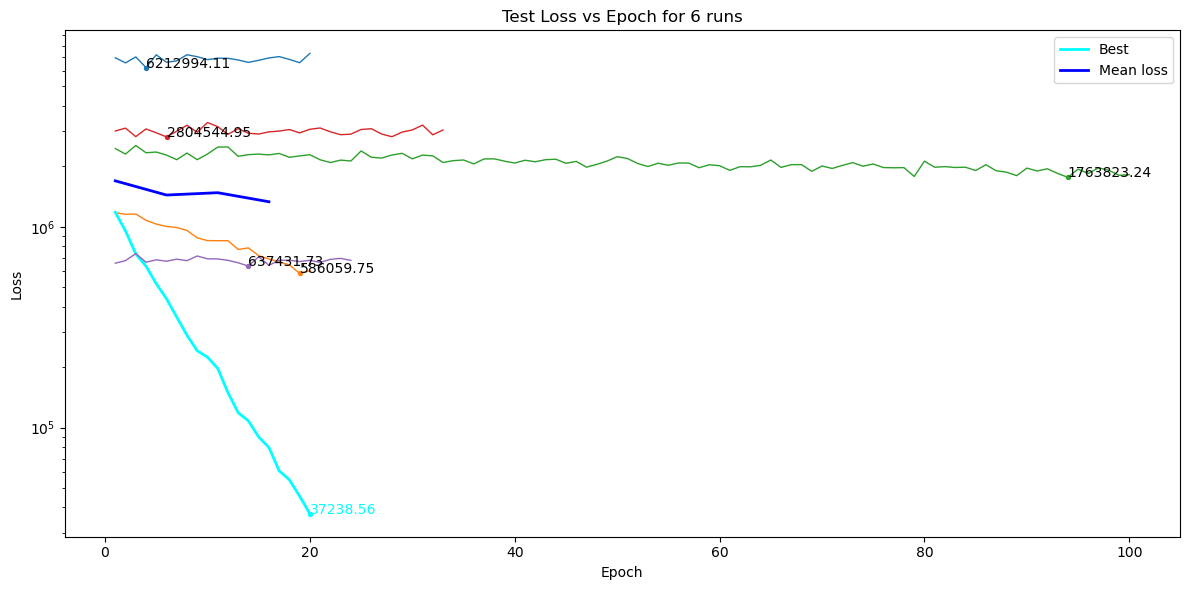

Hyper-Parameter tuning#18: [params]

optimiser: batch=66, learning_rate=1e-05, weight_decay=1e-08
STFT_VAE latent=10, layers=1, ratio=4.00
VariationalAutoEncoder compression: 11673.6 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList()
  (fc_mu): Linear(in_features=116736, out_features=10, bias=True)
  (fc_logvar): Linear(in_features=116736, out_features=10, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=10, out_features=116736, bias=True)
  )
)

model=STFT_VAE, approx size=2,334,740 parameters, exact=3,618,836, difference=-35.4837%
model: STFT_VAE latent=10, layers=1, ratio=4.00
train=950 samples, batch=66 --> 14.4 batches/epoch
total=4 sec, epoch=35 (0.1 sec/epoch), train=2513168.90 (2.53%), test=2450710.07 (-4.71%), overfit=0.98


In [ ]:
# Find out the best hyper-parameters to train this model (typically needs to run overnight)
optimise_hyper_parameters()

# Alternatively: train a model with the best hyper-parameters we've found so far.
#train_best_params()

In [ ]:
# Generate some new samples, either by interpolation or random perturbation
from Generate import *

# Test every sample and measure the error.
test_all()

# Create graphs of pair-wise encoding plots for a number of categories:
#plot_categories(["Vocal", "Piano", "Strings"])
plot_categories()

# Create a graph of various encodings: this is how I find out that a small latent layer should be feasible
plot_encodings()

#generate_morphs()

#generate_variations()

# Generate samples from each variable
#generate_main_encodings()